In [1]:
import numpy as N
import pylab as P

In [24]:
def _blob(x,y,area,colour):
    """
    Draws a square-shaped blob with the given area (< 1) at
    the given coordinates.
    """
    hs = N.sqrt(area) / 2
    xcorners = N.array([x - hs, x + hs, x + hs, x - hs])
    ycorners = N.array([y - hs, y - hs, y + hs, y + hs])
    P.fill(xcorners, ycorners, colour, edgecolor=colour)

def hinton(W, maxWeight=None):
    """
    Draws a Hinton diagram for visualizing a weight matrix.
    Temporarily disables matplotlib interactive mode if it is on,
    otherwise this takes forever.
    """
    reenable = False
    if P.isinteractive():
        P.ioff()
    P.clf()
    height, width = W.shape
    if not maxWeight:
        maxWeight = 2**N.ceil(N.log(N.max(N.abs(W)))/N.log(2))

    P.fill(N.array([0,width,width,0]),N.array([0,0,height,height]),'gray')
    P.axis('off')
    P.axis('equal')
    for x in range(width):
        for y in range(height):
            _x = x+1
            _y = y+1
            w = W[y,x]
            if w > 0:
                _blob(_x - 0.5, height - _y + 0.5, min(1,w/maxWeight),'white')
            elif w < 0:
                _blob(_x - 0.5, height - _y + 0.5, min(1,-w/maxWeight),'black')
    if reenable:
        P.ion()
    P.show()

In [16]:
# x is the input matrix with size (3, 4)
# This means there are 3 input patterns (rows) and 4 neurons in the input (columns).
x = N.array([[1,0,0,1],
             [0,1,0,0],
             [0,0,1,0]])
# y is the output matrix with size (3, 3)
# This means there are 3 output patterns (rows) and 3 neurons in the output (columns).
y = N.array([[1,0,0],
             [0,1,0],
             [0,0,1]])

print("Matrix (x)")
print(x)

print("Matrix (y)")
print(y)

# number of input patterns (rows of x)
N_pattern = x.shape[0]
print(N_pattern)

# number of neurons in the input (columns of x)
N_input = x.shape[1]
print(N_input)

# number of neurons in the output (columns of y)
N_output = y.shape[1]
print(N_output)

# learning rate for the algorithm
learning_rate = 0.001

# weights matrix that will be updated during training.
# Its shape is (N_output, N_input) (3x4).
# Initialize the weights to zero with N.zeros.
W = N.zeros((N_output, N_input))

# Iterate over the 3 input patterns
for k in range(N_pattern):
  # Iterate over each output neuron
  for j in range(N_output):
    # Iterate over each input neuron
    for i in range(N_input):
        # For each combination of input x[k,i] and output y[k,j]
        # calculate the contribution to the weight update.
        W[j, i] +=  learning_rate * x[k,i] * y[k,j]

        # the weight update follows a learning rule
        # where the weight between an input neuron and an output neuron
        # is increased based on the correlation between the input and output.
        
print(W)

Matrix (x)
[[1 0 0 1]
 [0 1 0 0]
 [0 0 1 0]]
Matrix (y)
[[1 0 0]
 [0 1 0]
 [0 0 1]]
3
4
3
[[0.001 0.    0.    0.001]
 [0.    0.001 0.    0.   ]
 [0.    0.    0.001 0.   ]]


In [22]:
Y_test = W @ x.T
print(Y_test)

[[0.002 0.    0.   ]
 [0.    0.001 0.   ]
 [0.    0.    0.001]]


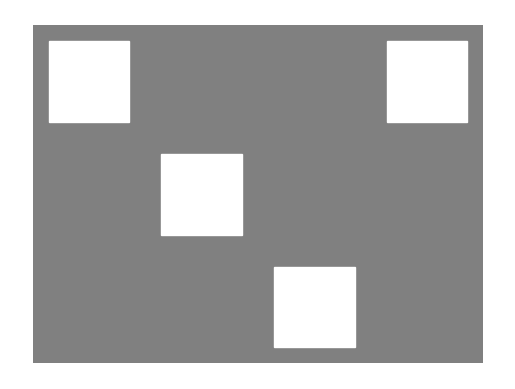

In [25]:
hinton(W)